In [ ]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')


### CS-260 Final Project:


#<u>Economic Indicators: An Examination of Global Trade </u>


###By Kerrigan de Meij and Josh Whalen

##<u> 1. Introduction </u>



For this project, we looked at the different economic measurements that contribute to a country's overall trade balance, and how a country's trade balance affects the economy and society of that country.  

The questions listed below are what we primarily focused on.

1. How has the number of countries with a Trade Surplus status moved over the last 70 years (between 1950-2019)?

2. Is it more common for countries around the world to have a Trade Surplus or Trade Deficit and how do they compare to eachother? What has been the recent data regarding the Trade Balance of countries in the last 10 years?

3. What are the top 10 countries with the highest Trade Surplus amount, and what are those countries' respective average annual hours worked by its population and Human Capital indeces?

4. How do countries' average amount of people employed in the nation change with their Trade Balance level over time?

5. Do countries with a low Human Capital Index (lower quality of life) tend to have more people engaged in work in the nation?

6. What is the most common level of Human Capital Index for all nations in the year 2019?



##<u> 2. Data </u>



This is the link to the website that we got our data from.
- www.ggdc.net/pwt

This is a folder that contains the CSV files that we used.
- https://drive.google.com/drive/folders/1J-NDg1xnwZr6Nd2ZewlP11NBrLZuPi_C?usp=drive_link

The data was found through the KDNuggets website, listing UC Davis Department of Economics as a source for economic databases. The Penn World Table (PWT 10.01 database) is a consistently updated database which incorporates data from various sources such as National Accounts (NA) data of countries globally, The Conference Board’s (TCB) Total Economy Database, the International Labour Office’s (ILO) official/modeled employment data, and the World Bank’s employment and labor force statistics reported in the World Development Indicators (WDI). This information is listed in the publicly documented information regarding PWT’s database and its data sources.

This documentation lists that PWT has taken originally collected data from various official sources, which was collected through a mix of multiple official household surveys internationally and utilized statistical models and revisions to create a comprehensive economic database on the UCDavis website.

Penn World Table is a trustworthy and reliable website that collects international data. The data has up to date national prices and it will allow us to do a complete analysis on our questions that we have.

****The data we chose did not cooperate when trying to make a scatterplot. Some of the variables in the dataset were not on the same scale or contained a lot of nulls which cause the queries to not excecute properly. However, we were still able to do a complete analysis.

In [ ]:
try:
    #Read in the needed csvs and create the DB
    na_accounts = pd.read_csv("pwt1001_na_table.csv")
    pwt_hc = pd.read_csv("pwt1001.csv")

    conn = sql.connect("pwt1001_na_table.db")
    na_accounts.to_sql('na_accounts', conn,  index = False)
    pwt_hc.to_sql('pwt_hc', conn,  index = False)


except:
    print("Issue during DB creation/connection")

In [ ]:
#Select all values from the National Accounts table, including nulls
sql_statement = """SELECT *
                   FROM na_accounts;"""

na_accounts = pd.read_sql_query(sql_statement, conn)
na_accounts

,countrycode,year,v_c,v_i,v_g,v_x,v_m,v_gdp,q_c,q_i,...,q_x,q_m,q_gdp,pop,xr,xr2,v_gfcf,q_gfcf,emp,avh
0,ABW,1970,190,105,46,329,304,354,273,119,...,446,391,469,0.0,2.0,2.0,104,112,NaN,None
1,ABW,1971,200,110,49,347,320,373,298,130,...,486,427,511,0.0,2.0,2.0,109,122,NaN,None
2,ABW,1972,211,116,51,365,337,392,325,142,...,530,466,558,0.0,2.0,2.0,115,133,NaN,None
3,ABW,1973,222,123,54,385,355,413,355,155,...,579,508,608,0.0,2.0,2.0,121,145,NaN,None
4,ABW,1974,234,129,57,405,374,435,387,169,...,631,554,664,0.0,2.0,2.0,128,158,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12583,ZWE,2015,"17,870","2,003","3,769","3,825","7,504","19,963","19,270","2,043",...,"3,417","6,703","20,893",14.0,1.0,1.0,"1,995","2,034",6.0,None
12584,ZWE,2016,"17,127","2,026","3,724","4,098","6,427","20,549","17,249","2,052",...,"4,134","6,483","21,051",14.0,1.0,1.0,"2,015","2,044",7.0,None
12585,ZWE,2017,"17,491","2,138","4,772","4,333","6,694","22,041","17,491","2,138",...,"4,333","6,694","22,041",14.0,1.0,1.0,"2,130","2,130",7.0,None
12586,ZWE,2018,"18,729","2,272","6,228","4,619","7,538","24,312","16,322","2,239",...,"3,065","5,001","23,105",14.0,1.0,1.0,"2,262","2,227",7.0,None


In [ ]:
#Select all values from the PenWorldTable to see Human Capital Index values included, including nulls
sql_statement = """SELECT *
                   FROM pwt_hc;"""

pwt_hc = pd.read_sql_query(sql_statement, conn)
pwt_hc

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40142.0,39799.0,14.0,6.0,None,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0
12806,ZWE,Zimbabwe,US Dollar,2016,41875.0,40963.0,14.0,7.0,None,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0
12807,ZWE,Zimbabwe,US Dollar,2017,44672.0,44317.0,14.0,7.0,None,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0
12808,ZWE,Zimbabwe,US Dollar,2018,44325.0,43421.0,14.0,7.0,None,3.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0


#1. LineGraph

##The Number of Countries with a Trade Surplus between 1950 and 2019



###<font color='green'>
Question 1) When did countries start acheiving the beneficial status of "Trade Surplus" in their Trade Balance account, and are there any other trends over the last 70 years (1950 to 2019) regarding the amount of countries with a Trade Surplus? </font>

In [ ]:
sql_statement = """
                    SELECT year, COUNT(DISTINCT(countrycode)) AS num_with_surplus
                    FROM na_accounts
                    WHERE v_x > v_m
                    GROUP BY year

                   """

na_accounts_linegraph = pd.read_sql_query(sql_statement, conn)
na_accounts_linegraph

,year,num_with_surplus
0,1950,25
1,1951,26
2,1952,30
3,1953,25
4,1954,23
...,...,...
65,2015,95
66,2016,104
67,2017,101
68,2018,99


([<matplotlib.axis.YTick at 0x786a1d9085e0>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100'),
  Text(0, 120, '120')])

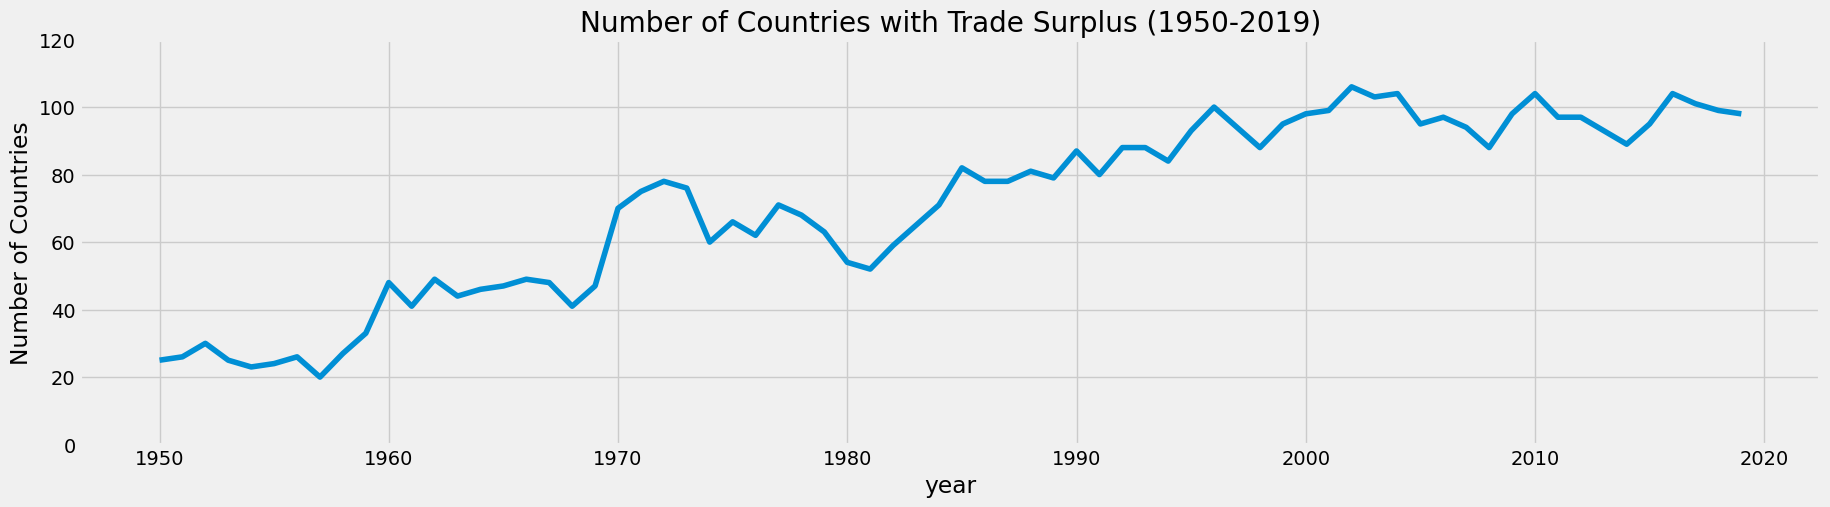

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(na_accounts_linegraph["year"], na_accounts_linegraph["num_with_surplus"])
plt.title('Number of Countries with Trade Surplus (1950-2019)')
plt.xlabel('year')
plt.ylabel('Number of Countries')
plt.yticks(np.arange(0,140,20))


In this visualization we compared how many countries had a trade surplus between the years 1950 and 2019. This line graph tells us that there has been a steady increase in the number of countries with a trade surplus over the last seventy years.
This visualization also gives us an accurate dipiction of the global historical timeline and how that relates to the economy of most countries, which then relates to trade surpluses/deficits.

The 1950s and 1960s were post World War II era which meant that a lot of countries were in the rebuilding process and their economies weren't functioning at full capacity. Countries in Asia and Europe were just starting to industrialize which explains why very few countries had a trade surplus during this time period.

The time period from the 1970s-1990s is when countries started to have consistent trade surpluses. This is showed in the visualization as the number of countries between 1970 and 1990 with trade surpluses increased.

The final time period of 1990 to 2010 is known as the 'Globalization Era' which explains why this time period had the most countries with a trade surplus. International trade was an important factor that led to increased trade between countries on a global scale. Countries began to advance their economies and began to specialize in certain sectors of the economy that brought a lot of value into their economy, and allowed sustainable growth.

#2. Barchart

###Number of countries having either a Trade Surplus or Trade Deficit in the last 10 years

###The last graph looked at countries with a Trade Surplus over time, now we see countries with a Trade Surplus versus Deficit with a closer look

###<font color='green'>
Question 2) Is it more common for countries around the world to have a Trade Surplus or Trade Deficit and how do they compare to eachother ? What has been the recent data regarding the Trade Balance of countries in the last 10 years?  </font>

In [ ]:
sql_statement = """
                    SELECT year, COUNT(DISTINCT(countrycode)) AS num_with_surplus
                    FROM na_accounts
                    WHERE v_x > v_m
                    AND year >= 2010
                    GROUP BY year

                   """

na_accounts_sur = pd.read_sql_query(sql_statement, conn)
na_accounts_sur

,year,num_with_surplus
0,2010,104
1,2011,97
2,2012,97
3,2013,93
4,2014,89
5,2015,95
6,2016,104
7,2017,101
8,2018,99
9,2019,98


In [ ]:
sql_statement = """
                    SELECT year, COUNT(DISTINCT(countrycode)) AS num_with_deficit
                    FROM na_accounts
                    WHERE v_m > v_x
                    AND year >= 2010
                    GROUP BY year

                   """

na_accounts_def = pd.read_sql_query(sql_statement, conn)
na_accounts_def

,year,num_with_deficit
0,2010,109
1,2011,116
2,2012,116
3,2013,120
4,2014,124
5,2015,118
6,2016,109
7,2017,112
8,2018,114
9,2019,115


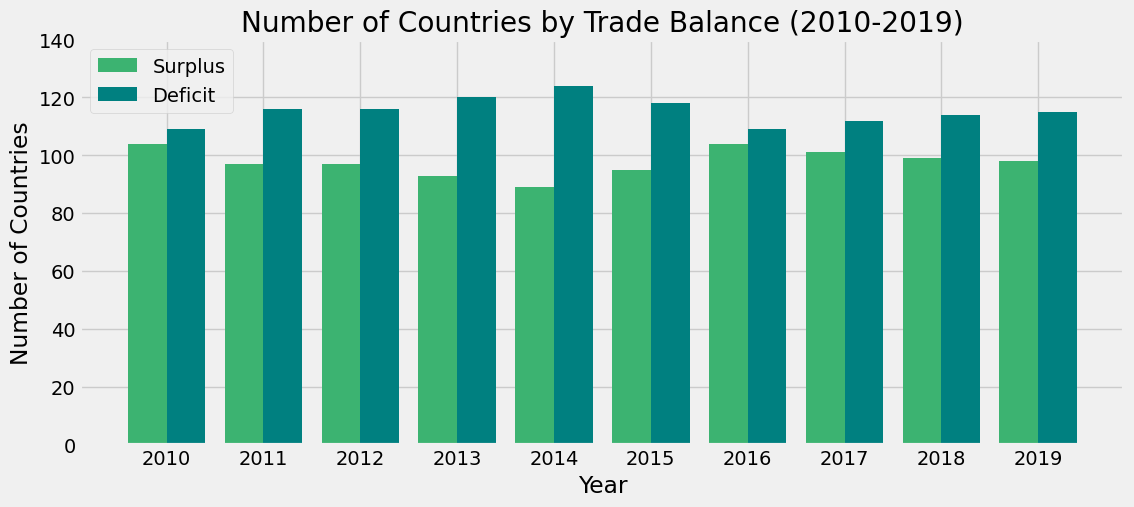

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(na_accounts_sur['year']-0.2, na_accounts_sur['num_with_surplus'], color='mediumseagreen',label='Surplus',width=0.4)
plt.bar(na_accounts_def['year']+0.2, na_accounts_def['num_with_deficit'], color='teal',label='Deficit',width=0.4)
plt.title('Number of Countries by Trade Balance (2010-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.yticks(np.arange(0,150,20))
plt.xticks(np.arange(2010,2020,1))
plt.legend()
plt.show()

The last visualization showed us that there has been a steady trend of more and more countries having a trade surplus up until around 2010. In this visualization, we created a barchart that shows the number of countries who have had a trade surplus(positive) balance or a trade deficit (negative) balance from 2010-2019. The results are very interesting because over the last ten years, there have been more countries with a trade deficit rather than a trade surplus.

Most of these countries who have had a trade deficit over the past ten years are considered to be developing economies. Generally, these countries have to spend more and they import a lot more goods & services to fuel their development and economic activity.
Advanced and well established economies inlcude the top global countries such as Japan and China.
The country that doesn't fit into this generalization is the United States. They have reported trade deficits in recent years and this is usually due to global demand changing, different economic policies, and of course geopolitical issues.


#3. Barchart

The previous grouped bar chart displayed that, over the last 10 years, more countries have had a Trade Deficit than a Trade Surplus. So what are the characteristics of the countries with a Trade Surplus, which generally tends to benefit a country's total GDP measurement?

###<font color='green'>
Question 3) What are the top 10 countries with the highest Trade Surplus amount, and what are those countries' respective average annual hours worked by its population and Human Capital indices?  </font>



In [ ]:
sql_statement = """
                    SELECT countrycode AS country, (v_x-v_m) AS trade_balance
                    FROM na_accounts
                    WHERE year = 2019
                    GROUP BY country
                    ORDER BY trade_balance DESC
                    LIMIT 10

                   """

na_accounts_top10sur = pd.read_sql_query(sql_statement, conn)
na_accounts_top10sur

,country,trade_balance
0,MWI,996
1,EGY,930
2,LBR,892
3,NER,886
4,DJI,844
5,VCT,840
6,JAM,801
7,WSM,724
8,YEM,713
9,DMA,602


([<matplotlib.axis.YTick at 0x786a102f0820>,
 [Text(0, 0, '0'),
  Text(0, 100, '100'),
  Text(0, 200, '200'),
  Text(0, 300, '300'),
  Text(0, 400, '400'),
  Text(0, 500, '500'),
  Text(0, 600, '600'),
  Text(0, 700, '700'),
  Text(0, 800, '800'),
  Text(0, 900, '900'),
  Text(0, 1000, '1000')])

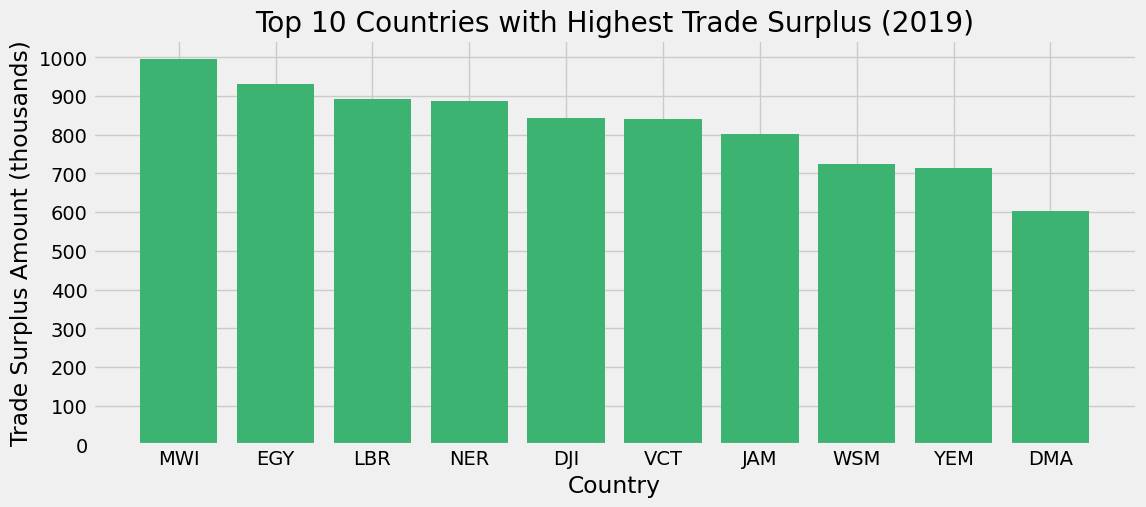

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(na_accounts_top10sur['country'], na_accounts_top10sur['trade_balance'], color='mediumseagreen')
plt.title('Top 10 Countries with Highest Trade Surplus (2019)')
plt.xlabel('Country')
plt.ylabel('Trade Surplus Amount (thousands)')
plt.yticks(np.arange(0,1100,100))

The visualization above is a bar chart that shows the top ten countries with the highest trade surplus (in thousands) in the year 2019. A high trade surplus means they export a lot of material and resources, but generally that economy doesn't import very much goods and materials to support it's citizens. So, its citizens generally have a low income level and the well being of society is poor and not sustainable.
Just because a country has a trade surplus and a positive cash flow due to exports, doesn't mean that country is well developed and sustainable for its citizens.

Nonetheless, there are many key important factors that allow for such a big trade surplus which our data has outlined in detail. Government consumption, general investment, and government policy are a few main factors that contribute to a country's trade surplus.
Investment in well established infrastructure such as up to date technology, factories, and even the production process all contribute to a country having a strong level of exports. It is also important to maintain strong government policies and relationships with other countries. Governments who can subsidize certain exports and encourage foreign trade/investment with neighboring countries will build a strong economy.

Most of these countries in the visualization above are  middle-eastern, so they have a lot of different natural resources such as oil, lumber, sugar, etc. which greatly drives up their exports.

#Below, we tried to display and graph these countries' characteristics, however all 10 countries have not recorded such data in the Penn World Table database (besides Egypt having a Human Capital Index of 1 on a scale of 1 - 4).



In [ ]:
sql_statement = """
                    SELECT na.year AS year, na.countrycode AS country, na.avh AS avg_annual_hrs_worked, hc AS hci
                    FROM na_accounts AS na
                    JOIN pwt_hc
                    USING(countrycode)
                    WHERE na.year = 2019
                    AND na.countrycode IN ('MWI','EGY','LBR','NER','DJI','VCT','JAM','WSM','YEM','DMA')
                    GROUP BY na.countrycode

                   """

na_accounts_top10s = pd.read_sql_query(sql_statement, conn)
na_accounts_top10s

,year,country,avg_annual_hrs_worked,hci
0,2019,DJI,None,NaN
1,2019,DMA,None,NaN
2,2019,EGY,None,1.0
3,2019,JAM,None,NaN
4,2019,LBR,None,NaN
5,2019,MWI,None,NaN
6,2019,NER,None,NaN
7,2019,VCT,None,NaN
8,2019,YEM,None,NaN


#4.Linegraph

Previousy we examined Trade Balance metrics categorically, and across time. Now we can incorporate other variables such as number of people employed on a global level, and a country's Human Capital Index.

######<font color='green'> Question 4) How do countries' average amount of people employed in the nation change with their Trade Balance level over time?  </font>

In [ ]:
sql_statement = """ SELECT year, AVG(emp) AS avg_employed_sur
                    FROM na_accounts
                    WHERE v_x > v_m
                    AND countrycode != 'CH2'
                    GROUP BY year

                   """

na_accounts_linegraph2s = pd.read_sql_query(sql_statement, conn)
na_accounts_linegraph2s

,year,avg_employed_sur
0,1950,16.227273
1,1951,15.166667
2,1952,13.750000
3,1953,11.739130
4,1954,7.523810
...,...,...
65,2015,16.483146
66,2016,17.969388
67,2017,17.604167
68,2018,16.086957


In [ ]:
sql_statement = """ SELECT year, AVG(emp) AS avg_employed_def
                    FROM na_accounts
                    WHERE v_m > v_x
                    AND countrycode != 'CH2'
                    GROUP BY year

                   """

na_accounts_linegraph2d = pd.read_sql_query(sql_statement, conn)
na_accounts_linegraph2d

,year,avg_employed_def
0,1950,6.095238
1,1951,5.956522
2,1952,18.050000
3,1953,19.720000
4,1954,19.468750
...,...,...
65,2015,15.298246
66,2016,14.085714
67,2017,14.878505
68,2018,16.603604


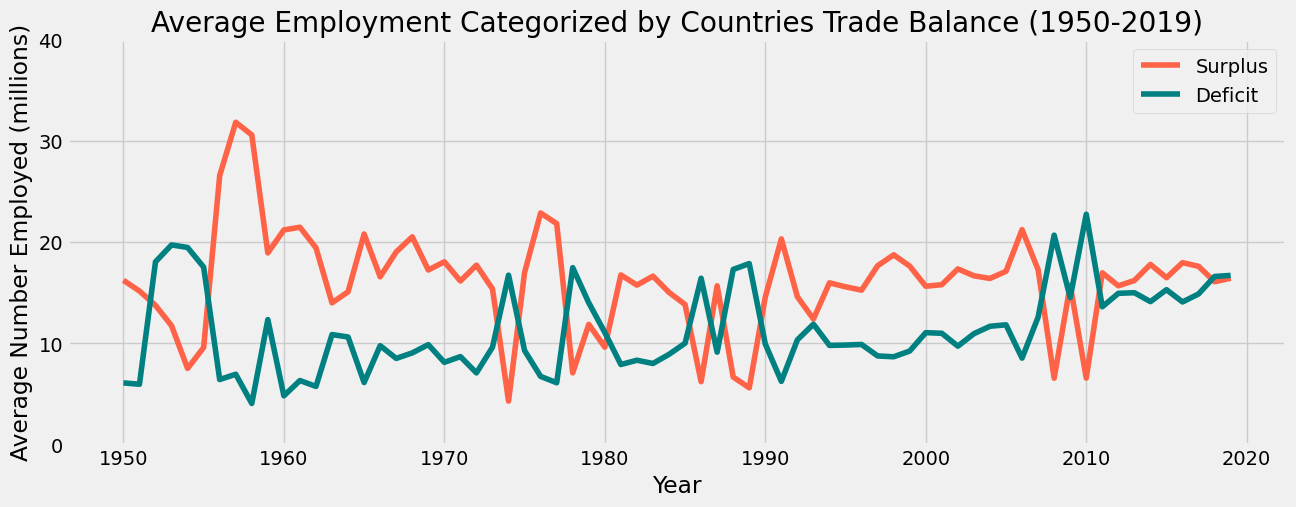

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(na_accounts_linegraph2s["year"], na_accounts_linegraph2s["avg_employed_sur"], color ='tomato', label = 'Surplus')
plt.plot(na_accounts_linegraph2d["year"], na_accounts_linegraph2d["avg_employed_def"], color = 'teal', label = 'Deficit')
plt.title('Average Employment Categorized by Countries Trade Balance (1950-2019)')
plt.xlabel('Year')
plt.ylabel('Average Number Employed (millions)')
plt.yticks(np.arange(0,50,10))
plt.xticks(np.arange(1950,2030,10))
plt.legend()
plt.show()

This visualization shows that at some points, for 10 years at a time the average amount of people employed in all nations was greater for those with a surplus rather than deficit. This is generally expected because countries with a trade surplus generally need more labor force participants to run the economy in order to have a greater amount of exports. Having an educated and skilled workforce is crucial to having a surplus in trade. The second part to that point, which is what the linegraph above explains, is getting enough citizens to participate in the workforce to keep up with demand and achieve economies of scale. That will improve the level of productivity and the efficiency of production as well.

This final visualization below specifically looks at how the human capital index (HCI) relates to the amount of citizens engaged in the workforce for a particular country.

#5. Barchart

######<font color='green'> Question 5) Do countries with a low Human Capital Index (lower quality of life) tend to have more people engaged in work in the nation?  </font>



In [ ]:
sql_statement = """ SELECT na.countrycode AS country, na.emp AS employed, hc AS HCI
                    FROM pwt_hc
                    JOIN na_accounts AS na
                    USING(countrycode)
                    WHERE hc = 4.0
                    AND na.emp > 0
                    AND na.year = 2019
                    GROUP BY na.countrycode
                    ORDER BY na.emp DESC
                    LIMIT 10
                   """

na_accounts_hci4 = pd.read_sql_query(sql_statement, conn)
na_accounts_hci4

,country,employed,HCI
0,USA,158.0,4.0
1,JPN,70.0,4.0
2,DEU,45.0,4.0
3,GBR,33.0,4.0
4,KOR,27.0,4.0
5,CAN,19.0,4.0
6,AUS,13.0,4.0
7,CZE,5.0,4.0
8,CHE,5.0,4.0
9,SGP,4.0,4.0


In [ ]:
sql_statement = """ SELECT na.countrycode AS country, na.emp AS employed, hc AS HCI
                    FROM pwt_hc
                    JOIN na_accounts AS na
                    USING(countrycode)
                    WHERE hc = 1.0
                    AND na.year = 2019
                    GROUP BY na.countrycode
                    ORDER BY na.emp DESC
                    LIMIT 10
                   """

na_accounts_hci1 = pd.read_sql_query(sql_statement, conn)
na_accounts_hci1

,country,employed,HCI
0,CHN,799.0,1.0
1,IND,498.0,1.0
2,IDN,131.0,1.0
3,BRA,94.0,1.0
4,NGA,73.0,1.0
5,BGD,66.0,1.0
6,PAK,63.0,1.0
7,ETH,58.0,1.0
8,VNM,50.0,1.0
9,PHL,42.0,1.0


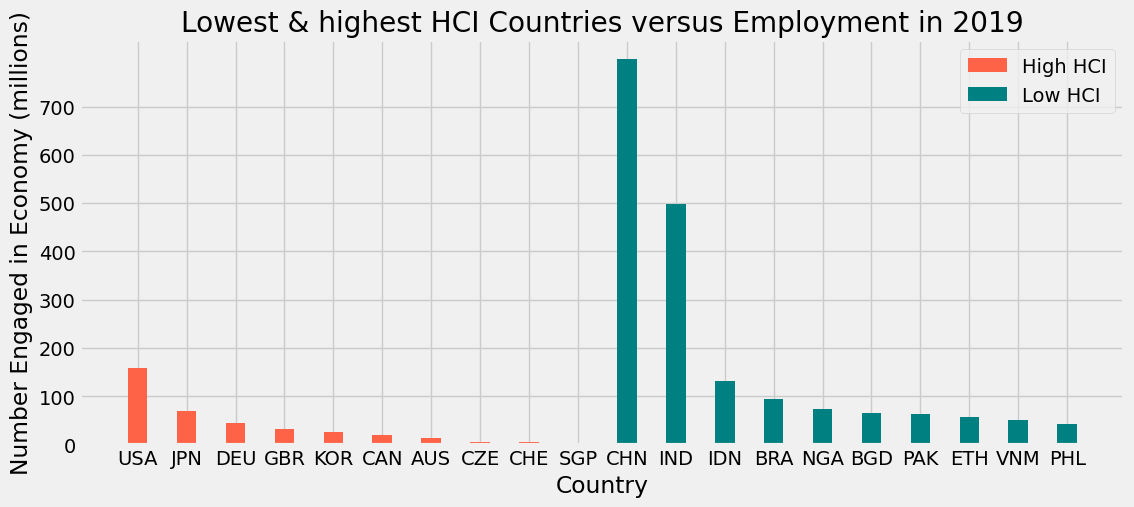

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(na_accounts_hci4['country'], na_accounts_hci4['employed'], color='tomato', label='High HCI',width=0.4)
plt.bar(na_accounts_hci1['country'], na_accounts_hci1['employed'], color='teal', label='Low HCI',width=0.4)
plt.title('Lowest & highest HCI Countries versus Employment in 2019')
plt.xlabel('Country')
plt.ylabel('Number Engaged in Economy (millions)')
plt.yticks(np.arange(0,800,100))
plt.legend()

This visualization depicts the top ten countries that have the highest or the lowest HCI and how many people are engaged in the economy for a particular country. This visualization shows that the ten of the lowest HCI countries all have higher engagement in the economy. This means that more people are willing to work, even though that country has a low HCI. This seems backwards but it really isn't because the HCI of a country measures how productive will a child born today be as a future worker if he/she has a full education and has good health. So, having a high HCI is important because that means the system set in place in that particular country is able to get more potential and productivity out of their citizens compared to a country with a lower HCI.

So, in the barchart above, the countries with the lowest HCI need more engagement in the economy from their citizens because the participants in the economy might not be as skilled and prepared to keep up with the level of production needed to run the economy. However, this is not the only factor driving this trend. A country with a low HCI will have minimal job opportunities, so the citizens in the workforce are more inclined to continue working at their job even if they don't enjoy it because they have no other option.  

#6. Histogram

Lastly, subcategories were created in order to group countries' HCI index into either a low HCI value of 0 to 1, a medium HCI value of 2 to 3, or a high HCI value of 4.

###<font color='green'> Question 6) What is the most common level of Human Capital Index for all nations in the year 2019? </font>



In [ ]:
sql_statement = """ SELECT DISTINCT(countrycode),
                    CASE
                        WHEN hc = 0 THEN 'lowest HCI'
                        WHEN hc = 1 THEN 'low HCI'
                        WHEN hc = 2 THEN 'medium HCI'
                        WHEN hc = 3 THEN 'high HCI'
                        ELSE 'highest HCI'
                      END HCI_bins
                    FROM pwt_hc
                    WHERE hc IS NOT NULL
                    AND year = 2019
                    GROUP BY countrycode
                    ORDER BY HCI_bins

                   """

na_accounts_histogram = pd.read_sql_query(sql_statement, conn)
na_accounts_histogram

,countrycode,HCI_bins
0,ALB,high HCI
1,ARE,high HCI
2,ARG,high HCI
3,ARM,high HCI
4,AUT,high HCI
...,...,...
140,SWZ,medium HCI
141,TGO,medium HCI
142,TZA,medium HCI
143,UGA,medium HCI


Text(0.5, 1.0, 'Countries Categorized by HCI Index (2019)')

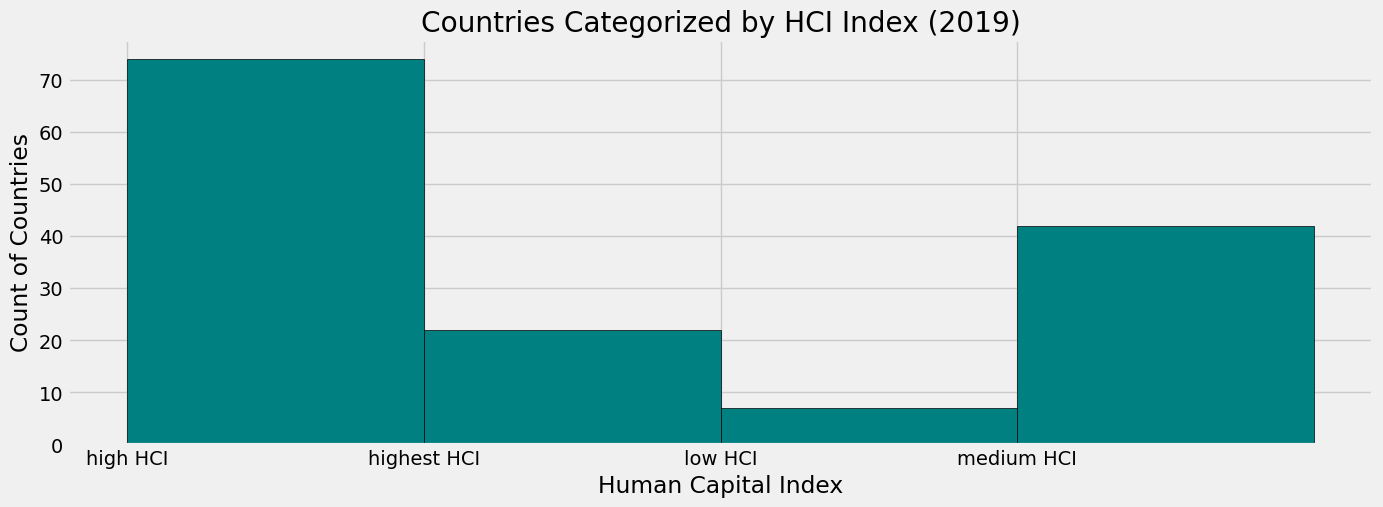

In [ ]:
plt.figure(figsize=(15,5))
outputs = plt.hist(na_accounts_histogram['HCI_bins'], ec= 'black', bins = np.arange(0,5,1), color = 'teal')
plt.xlabel("Human Capital Index")
plt.ylabel('Count of Countries')
plt.title("Countries Categorized by HCI Index (2019)")

This last visualization is a simple histogram that groups a countries HCI index into either a low HCI value of 0 to 1, a medium HCI value of 2 to 3, or a high HCI value of 4 for the year 2019. For this year, a high HCI was the most common among countries around the world.

This is a good trend because it means that more likely than not, the goverment is willing to create programs and policies that encourage children and young adults to get an education. They also are willing to provide basic, but important, healthcare policies to the general population as well which citizens in other countries unfortunately don't have access to.

A country's HCI isn't directly related to their trade balance, however it does influence other key factors that build a successful and sustainable economy, which will then drive up a country's exports, resulting in a trade surplus.

#Conclusion

The data that we have analyzed has proven that a country's trade surplus or deficit depends on a lot of key important factors. Those factors that were explained throughout this analysis include a strong investment in infrastructure, programs/policies implemented by the government that support the well-being of a country's society, and a strong competitive economy that is built for the future. A country that has a trade surplus, builds relationships with other global countries and will only improve productivity and innovation. But, having a skilled workforce and having a strong economy will not only create favorable trade balances, it will set up a nation for sustainable and long-term success. While a country should always look to improve their economic ability, it is more important to strive for better human capital improvement because that maintains not only economic prosperity, but societal prosperity.